In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import healpy as hp
from functions import loc2data, get_rand_locs

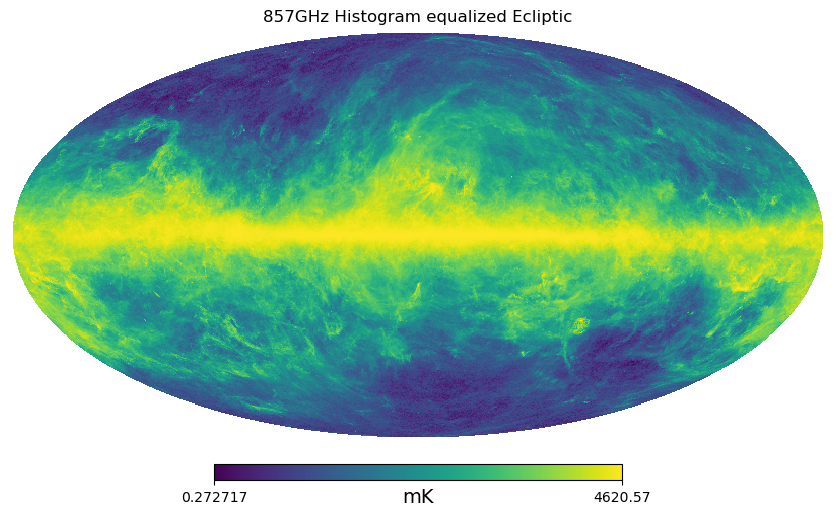

In [2]:
m_857 = hp.read_map("skymaps/HFI_SkyMap_857_2048_R1.10_nominal.fits")
nside = 1024
m_857 = hp.ud_grade(m_857, nside)
hp.mollview(
    m_857,
    #coord=["G", "E"],
    title="857GHz Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
)

In [3]:
num_locs = 10000
loc_list = get_rand_locs(num_locs, sphere_distr=True)

In [4]:
map_array = np.copy(m_857)
circ_radius = np.pi / 180
cutout_radius = circ_radius / 10
annulus_images = []
source_images = []

for loc in loc_list:
    loc_deg = np.rad2deg(loc)
    loc_pix = hp.ang2pix(nside, *loc_deg, lonlat=True)
    annulus_2d, source_2d = loc2data(map_array, loc, circ_radius, cutout_radius, show_gnomview=False)
    annulus_images.append(annulus_2d)
    source_images.append(source_2d)

complete_images = np.array(annulus_images) + np.array(source_images)

/Users/harjassandhu/anaconda3/envs/chang_baxter_research/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


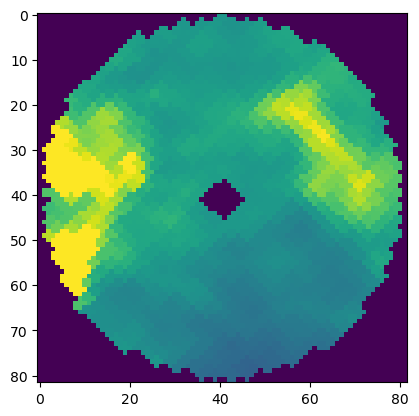

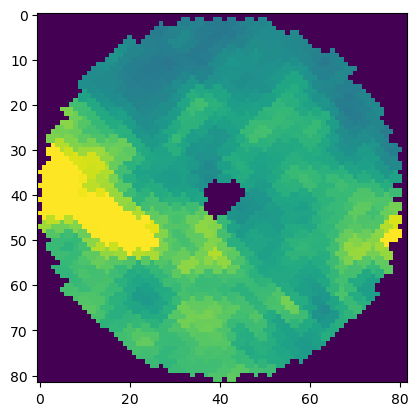

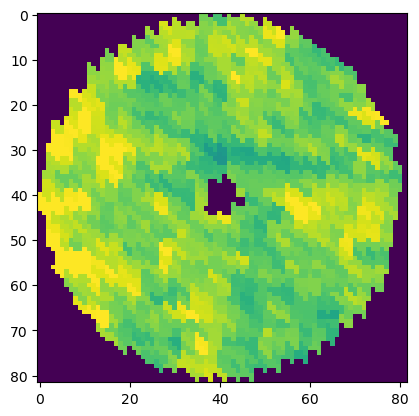

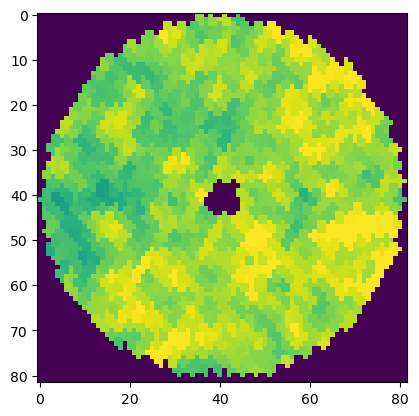

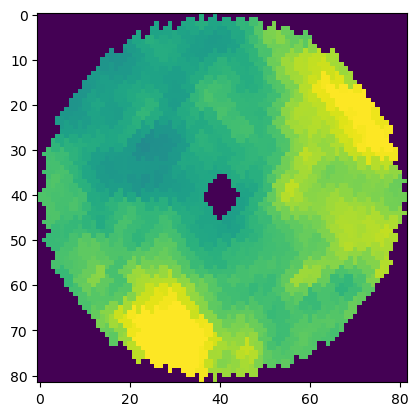

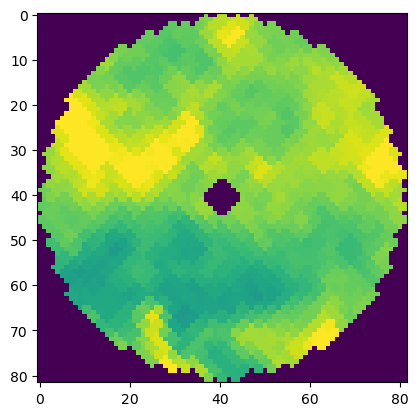

In [5]:
count = 0
for annulus_image in annulus_images:
    range_max = np.percentile(annulus_image[annulus_image != 0], 95)
    plt.imshow(np.flip(annulus_image, 0), vmax=range_max) # For some reason, gnomview returns flipped image? Maybe just include this in functions.py?
    plt.show()
    count += 1
    if count > 5:
        break

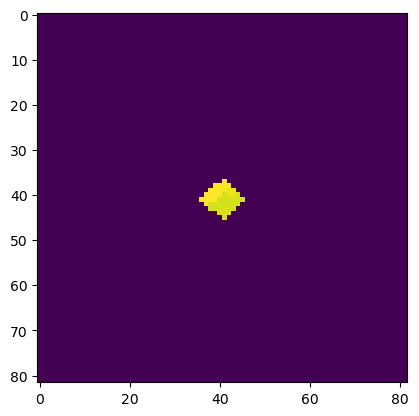

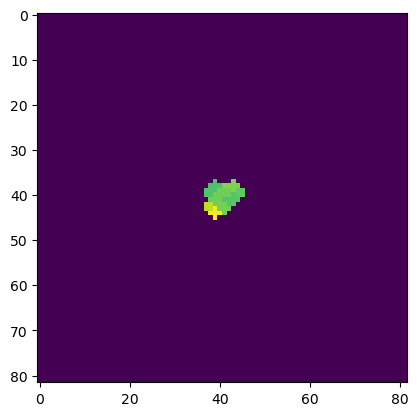

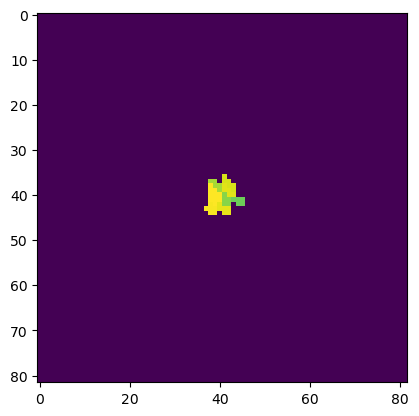

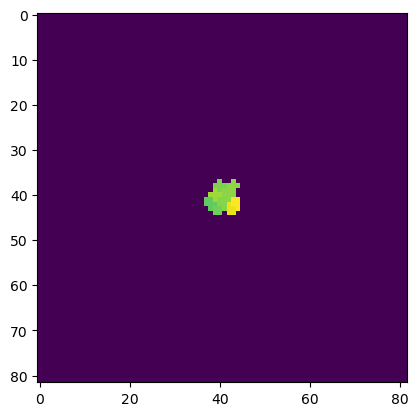

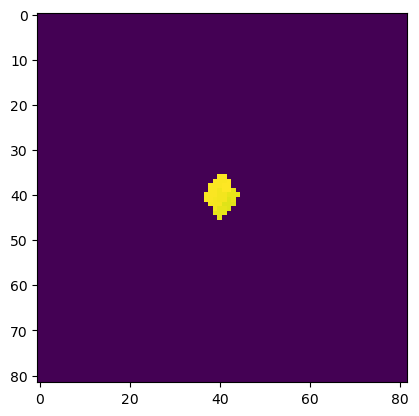

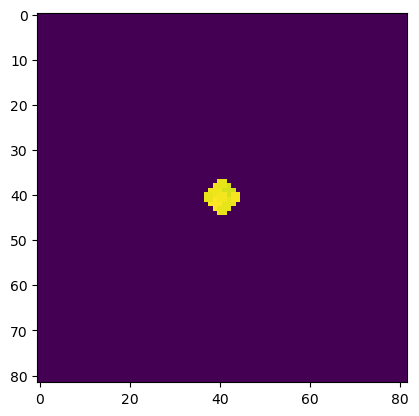

In [6]:
count = 0
for source_image in source_images:
    range_max = np.percentile(source_image[source_image != 0], 95)
    plt.imshow(np.flip(source_image, 0), vmax=range_max) # For some reason, gnomview returns flipped image? Maybe just include this in functions.py?
    plt.show()
    count += 1
    if count > 5:
        break

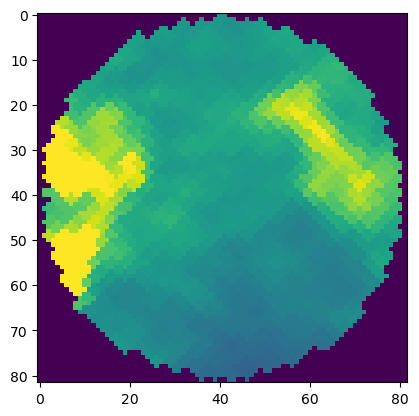

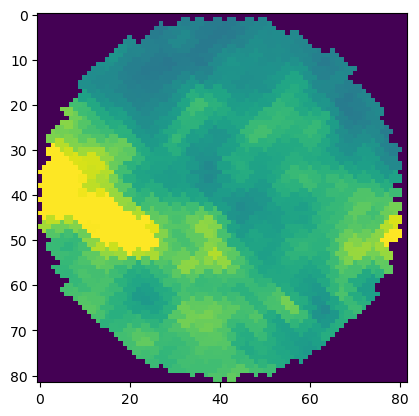

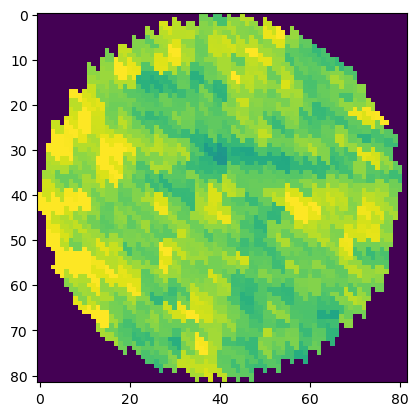

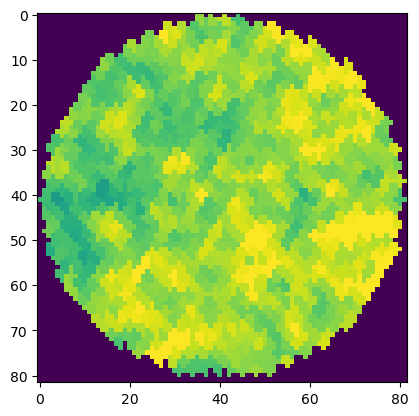

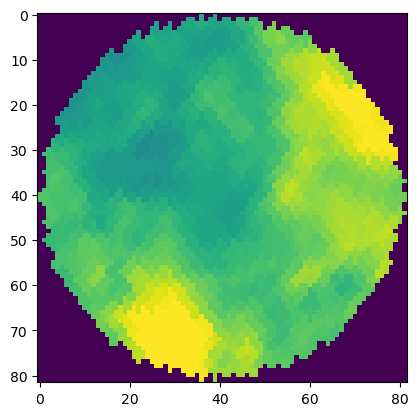

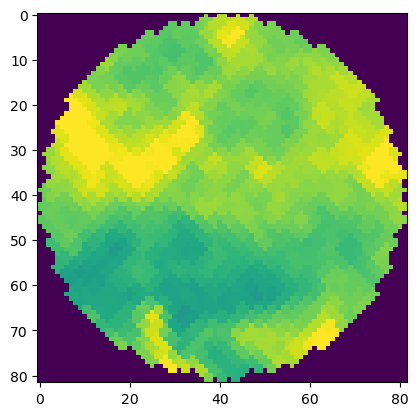

In [7]:
count = 0
for complete_image in complete_images:
    range_max = np.percentile(complete_image[complete_image != 0], 95)
    plt.imshow(np.flip(complete_image, 0), vmax=range_max) # For some reason, gnomview returns flipped image? Maybe just include this in functions.py?
    plt.show()
    count += 1
    if count > 5:
        break

# THE BELOW CODE WILL SAVE THE IMAGES

In [16]:
for i, image in enumerate(complete_images):
    plt.imsave(f"/Users/harjassandhu/Downloads/training_data/completed_images/complete_image_{i+1}.png", image)

In [17]:
for i, image in enumerate(annulus_images):
    plt.imsave(f"/Users/harjassandhu/Downloads/training_data/annulus_images/annulus_image_{i+1}.png", image)

In [18]:
for i, image in enumerate(source_images):
    plt.imsave(f"/Users/harjassandhu/Downloads/training_data/source_images/source_image_{i+1}.png", image)